In [1]:
#import libraries
import tensorflow as tf
import numpy as np
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import dataset
dataset = pd.read_csv('house_price.csv')
X = dataset.iloc[:,3:].values
y = dataset.iloc[:,2].values  ##PRICE


#convert the date format to normal
for i in range(0,21613):
    dataset['date'][i] = dataset['date'][i][:8]

for i in range(0,21613):
    dataset['date'][i] = dataset['date'][i][:4] + '-' + dataset['date'][i][4:6] + '-' + dataset['date'][i][6:8]
    


In [3]:

#Convert date to a ordinal number
import datetime
from datetime import date
dataset["date"] = pd.to_datetime(dataset["date"], dayfirst = True)
dataset['date'] = dataset['date'].map(date.toordinal)


In [4]:
#Check the number of NULL values in each column
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
#Statistical Data of the dataset
dataset.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,735535.193078,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,113.048011,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,735355.000000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,735436.000000,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,735522.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,735646.000000,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,735745.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
#DataTypes of the Dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  int64  
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

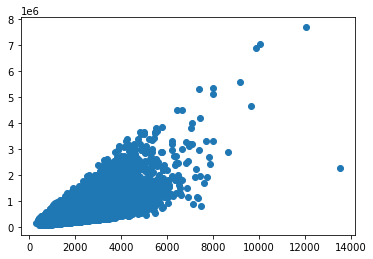

In [7]:
#Data VIsualization
plt.scatter(dataset['sqft_living'],dataset['price'])

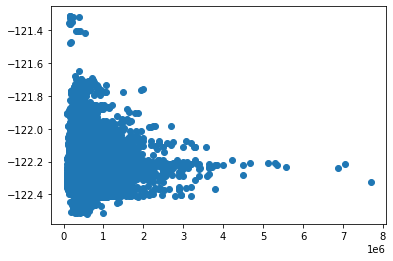

In [8]:
plt.scatter(dataset['price'], dataset['long'])

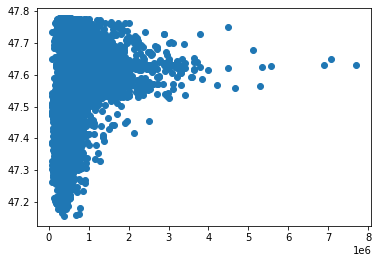

In [9]:
plt.scatter(dataset['price'], dataset['lat'])

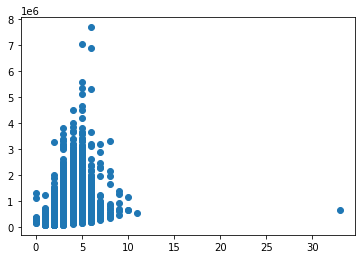

In [10]:
plt.scatter( dataset['bedrooms'],dataset['price'])

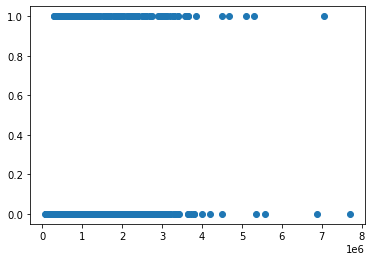

In [11]:
plt.scatter( dataset['price'],dataset['waterfront'])

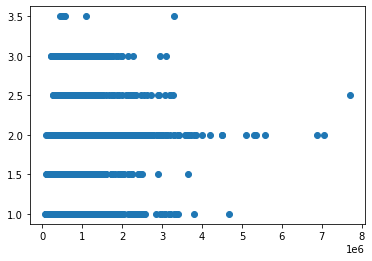

In [12]:
plt.scatter( dataset['price'],dataset['floors'])

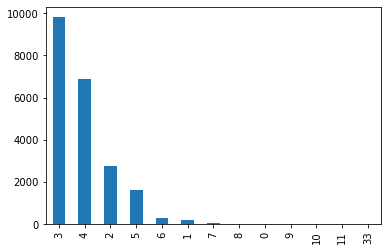

In [13]:
#Data Visualization
dataset['bedrooms'].value_counts().plot(kind = 'bar')

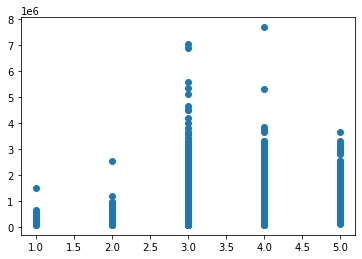

In [14]:
plt.scatter( dataset['condition'],dataset['price'])

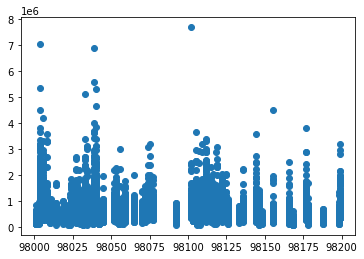

In [15]:
plt.scatter( dataset['zipcode'],dataset['price'])

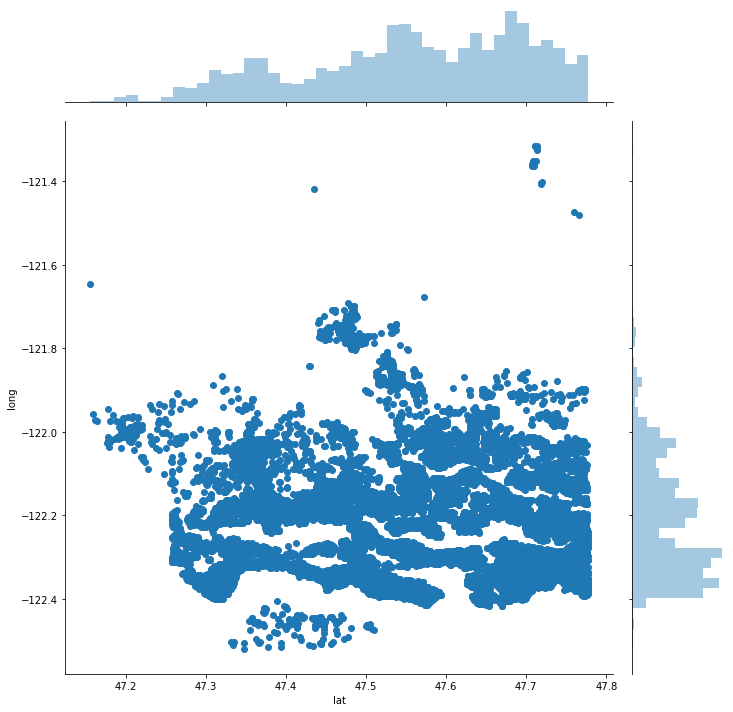

In [16]:
sns.jointplot(dataset['lat'], dataset['long'], height = 10)

In [17]:
#Data Preprocessing
#Splitting of dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
y_train = sc.fit_transform(y_train.reshape(-1,1))
y_test= sc.transform(y_test.reshape(-1,1))

NameError: name 'regressor' is not defined

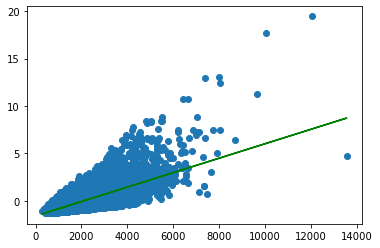

In [18]:
#Linear Regression analysis for sqft_living to predict the price
from sklearn.linear_model import LinearRegression
regressor_sqft_living = LinearRegression()
regressor_sqft_living.fit(X_train[:,2].reshape(-1,1),y_train)

#Prediction
y_pred = regressor_sqft_living.predict(X_test[:,2].reshape(-1,1)).reshape(-1,1)

#Visualization
plt.scatter(X_train[:,2].reshape(-1,1), y_train)
plt.plot(X_train[:,2], regressor_sqft_living.predict(X_train[:,2].reshape(-1,1)), color = 'green')

#Predicting for a single value
sc.inverse_transform(regressor.predict([[2000]]))

Text(0.5, 1.0, 'Price Prediction')

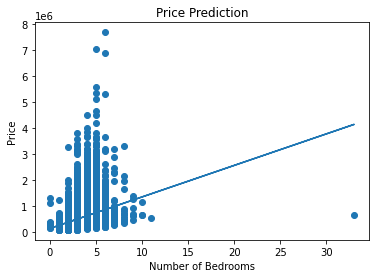

In [19]:
#Prediction Analysis of Price by considering Nuber of Bedrooms
regressor_bedrooms = LinearRegression()
regressor_bedrooms.fit(X[:,0].reshape(-1,1),y)

#Predict the house price for 3 bedrooms
regressor_bedrooms.predict([[3]]) 

#Create a dataframe where it contains 3 bedrooms 
dataset_bedrooms_3 = dataset[dataset['bedrooms'] == 3]

#Calculate the mean of the price 
dataset_bedrooms_3['price'].mean() ##It will return the nearest value to the above prediction

#Visualization
plt.scatter(X[:,0].reshape(-1,1), y)
plt.plot(X[:,0].reshape(-1,1), regressor_bedrooms.predict(X[:,0].reshape(-1,1)))
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Price Prediction')

Text(0.5, 1.0, 'Price Prediction')

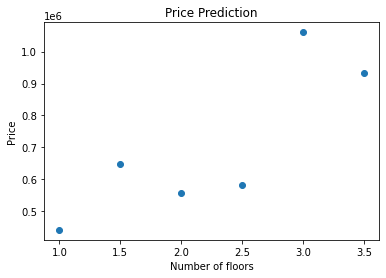

In [20]:
#Prediction Analysis of Price by considering Number of floors
regressor_floors = LinearRegression()
regressor_floors.fit(X[:,4].reshape(-1,1), y)

#Predict the house price for 1 floor
regressor_floors.predict([[1]])

#Create a dataframe where it contains 1 floor
dataset_floors_1 = dataset[dataset['floors']==1]

#Calculate the mean of the price 
dataset_floors_1['price'].mean()  ##It will return the nearest value to the above prediction

floors = dataset['floors'].unique()

mean_price_floors = []
for i in range(int(dataset['floors'].min()),int(dataset['floors'].max() + 4)):
    mean_price_floors.append(dataset[dataset['floors']==i/2 + 0.5]['price'].mean())
    
#Visualization
plt.scatter(floors,mean_price_floors)
plt.xlabel('Number of floors')
plt.ylabel('Price')
plt.title('Price Prediction')

Text(0.5, 1.0, 'Price Prediction')

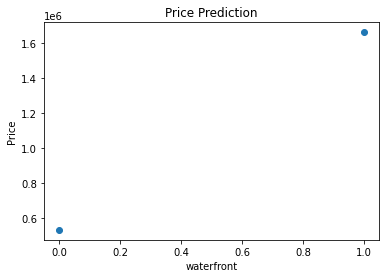

In [21]:

dataset_waterfront_0 = dataset[dataset['waterfront']==0]
dataset_waterfront_1 = dataset[dataset['waterfront']==1]

#mean prices of houses having waterfront and not having waterfront
waterfront_mean_price = [dataset_waterfront_0['price'].mean(),dataset_waterfront_1['price'].mean()]

#Visualization
waterfront = dataset['waterfront'].unique()
plt.scatter(waterfront,waterfront_mean_price)
plt.xlabel('waterfront')
plt.ylabel('Price')
plt.title('Price Prediction')

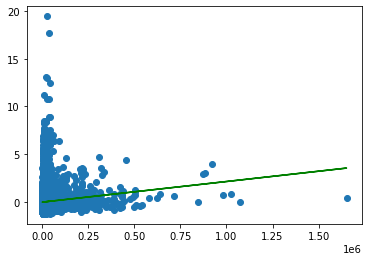

In [22]:
from sklearn.linear_model import LinearRegression
regressor_sqft_lot = LinearRegression()
regressor_sqft_lot.fit(X_train[:,3].reshape(-1,1),y_train)
plt.scatter(X_train[:,3].reshape(-1,1), y_train)
plt.plot(X_train[:,3], regressor_sqft_lot.predict(X_train[:,3].reshape(-1,1)), color = 'green')

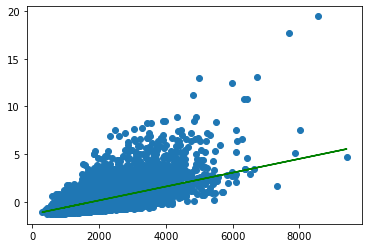

In [23]:
from sklearn.linear_model import LinearRegression
regressor_sqft_above = LinearRegression()
regressor_sqft_above.fit(X_train[:,9].reshape(-1,1),y_train)
plt.scatter(X_train[:,9].reshape(-1,1), y_train)
plt.plot(X_train[:,9], regressor_sqft_above.predict(X_train[:,9].reshape(-1,1)), color = 'green')

Text(0, 0.5, 'Price')

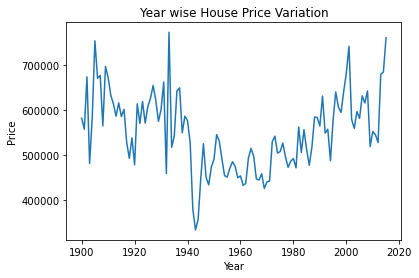

In [24]:
#Price Analysis based on built_in  year
mean_price_yr_built = []
for i in range(dataset['yr_built'].unique().shape[0]):
    mean_price_yr_built.append(dataset[dataset['yr_built']==dataset['yr_built'].min()+i]['price'].mean())
yrs = dataset['yr_built'].unique()
yrs.sort()

#Visualization
plt.plot(yrs,mean_price_yr_built)
plt.title('Year wise House Price Variation')
plt.xlabel('Year')
plt.ylabel('Price')